In [1]:
import sys
!{sys.executable} -m pip install opencv-python

In [2]:

# Importing Libraries
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
""" Authored By: Alokendu Mazumder"""

In [3]:
Path2 = './Downloads/IETR_DIBR_database_PNG/'
files2 = os.listdir(Path2)
images = []

#Readling all the images and storing into an array
for name in files2:
    temp = cv2.imread(Path2+name)
    temp = cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)
    temp = cv2.resize(temp, (100,100), interpolation = cv2.INTER_AREA)
    images.append(temp.flatten())

In [72]:
#Substracting mean from all images for normalization    
images = np.array(images)
mu = np.mean(images,0)
images = images-mu

print (images.shape)


(10000, 140)


In [73]:
u, s, v = np.linalg.svd(images, full_matrices=False)
print(u.shape)

(10000, 140)


In [5]:
Path3 = './Downloads/Original_IETR/'
files3 = os.listdir(Path3)
images_orig = []

#Readling all the images and storing into an array
for namex in files3:
    tempx = cv2.imread(Path3+namex)
    tempx = cv2.cvtColor(tempx,cv2.COLOR_BGR2GRAY)
    tempx = cv2.resize(tempx, (100,100), interpolation = cv2.INTER_AREA)
    images_orig.append(tempx.flatten())

In [76]:
images_orig = np.array(images_orig)
mu1 = np.mean(images_orig,0)
images_orig = images_orig-mu1

print (images_orig.shape)

(10000, 10)


In [78]:
u1, s1, v1 = np.linalg.svd(images_orig, full_matrices=False)
print(u1.shape)

(10000, 10)


[ 0.52818759  0.          0.52818759  1.05637518  0.52818759  1.05637518
  1.05637518  0.52818759  1.58456276  2.11275035  1.58456276  0.52818759
  2.11275035  2.11275035  3.16912553  3.69731311  5.81006347  7.39462623
  5.81006347  5.28187588  6.33825105  4.75368829  5.28187588  4.75368829
  6.33825105  5.81006347  3.16912553  5.28187588  4.2255007   8.45100141
  5.81006347  4.75368829  6.86643864  7.92281382 10.03556417 11.62012693
 17.95837799 15.31744005 17.95837799 17.4301904  17.95837799 16.90200281
 19.01475316 15.84562763 17.4301904  16.37381522 15.84562763 20.59931593
 30.63488009 18.48656557 27.99394215 24.82481663 30.10669251 25.8811918
 33.80400562 33.80400562 38.02950632 32.21944286 36.97313115 31.69125527
 33.27581803 31.69125527 35.38856838 40.14225667 30.63488009 32.21944286
 36.44494356 40.14225667 34.8603808  38.02950632 34.8603808  43.83956979
 36.97313115 38.55769391 40.67044426 32.21944286 35.38856838 40.14225667
 41.19863185 29.57850492 43.83956979 30.10669251 36.

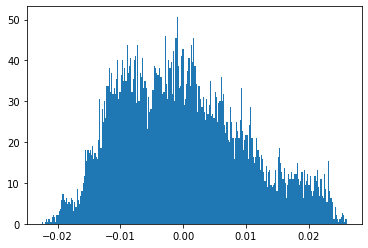

In [79]:
xx, bins, p=plt.hist(u1[:,0], 256, density=True) 
print(xx)

(10, 256)


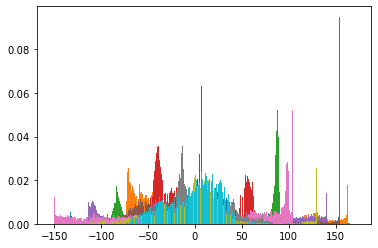

In [80]:
pdf_orig=[]
for i in range(images_orig.shape[1]):
    xx, bins, p=plt.hist(images_orig[:,i], 256, density=True)
    pdf_orig.append(xx)
pdf_orig=np.array(pdf_orig)

print(pdf_orig.shape)

(140, 256)


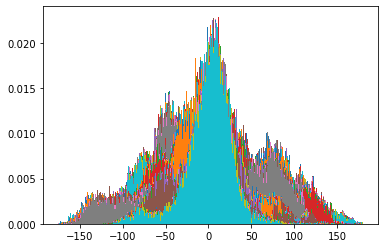

In [81]:
pdf_test=[]
for j in range(images.shape[1]):
    xxx, bins, p=plt.hist(images[:,j], 256, density=True)
    pdf_test.append(xxx)
pdf_test=np.array(pdf_test)
print(pdf_test.shape)

In [82]:
epsilon=0.00000001
pdf_orig=pdf_orig+epsilon
pdf_test=pdf_test+epsilon


In [83]:
#defining cross entropy loss for scoring

def KL(x, y):
    x = np.asarray(x, dtype=np.float)
    y = np.asarray(y, dtype=np.float)

    return np.sum(x * np.log2(y), 0)

In [84]:
pdf_test1=pdf_test[0:14,]
pdf_test2=pdf_test[14:28,]
pdf_test3=pdf_test[28:42,]
pdf_test4=pdf_test[42:56,]
pdf_test5=pdf_test[56:70,]
pdf_test6=pdf_test[70:84,]
pdf_test7=pdf_test[84:98,]
pdf_test8=pdf_test[98:112,]
pdf_test9=pdf_test[112:126,]
pdf_test10=pdf_test[126:140,]

pdf_synthetic1=np.append(pdf_test2,pdf_test3)
pdf_syn=np.append(pdf_synthetic1,pdf_test10)
print(pdf_test10.shape)
#print(pdf_syn)

(14, 256)


In [85]:

print(KL(pdf_orig[0,:],pdf_test1[9,:]))

-8.248087812640897


In [86]:
KLD1=[]
KLD2=[]
KLD3=[]
KLD4=[]
KLD5=[]
KLD6=[]
KLD7=[]
KLD8=[]
KLD9=[]
KLD10=[]


for k1 in range(0,14):
    KLD1.append(KL(pdf_orig[0,:],pdf_test1[k1,:]))
    KLD2.append(KL(pdf_orig[1,:],pdf_test2[k1,:]))
    KLD3.append(KL(pdf_orig[2,:],pdf_test3[k1,:]))
    KLD4.append(KL(pdf_orig[3,:],pdf_test4[k1,:]))
    KLD5.append(KL(pdf_orig[4,:],pdf_test5[k1,:]))
    KLD6.append(KL(pdf_orig[5,:],pdf_test6[k1,:]))
    KLD7.append(KL(pdf_orig[6,:],pdf_test7[k1,:]))
    KLD8.append(KL(pdf_orig[7,:],pdf_test8[k1,:]))
    KLD9.append(KL(pdf_orig[8,:],pdf_test9[k1,:]))
    KLD10.append(KL(pdf_orig[9,:],pdf_test10[k1,:]))
    
    

#Synthetic scores array

KLD_syn=[]
KLD_syn.append(KLD3)
KLD_syn.append(KLD4)
KLD_syn.append(KLD10)

KLD_synf=np.array(KLD_syn)
KLD_syn=KLD_synf.flatten()
print(KLD_syn.shape)

(42,)


In [87]:
""""KLD_arr=[]
KLD_arr.append(KLD1)
KLD_arr.append(KLD2)
KLD_arr.append(KLD3)
KLD_arr.append(KLD4)
KLD_arr.append(KLD5)
KLD_arr.append(KLD6)
KLD_arr.append(KLD7)
KLD_arr.append(KLD8)
KLD_arr.append(KLD9)
KLD_arr.append(KLD10)
KLD_arr=np.array(KLD_arr)

print(KLD_arr.shape)"""

'"KLD_arr=[]\nKLD_arr.append(KLD1)\nKLD_arr.append(KLD2)\nKLD_arr.append(KLD3)\nKLD_arr.append(KLD4)\nKLD_arr.append(KLD5)\nKLD_arr.append(KLD6)\nKLD_arr.append(KLD7)\nKLD_arr.append(KLD8)\nKLD_arr.append(KLD9)\nKLD_arr.append(KLD10)\nKLD_arr=np.array(KLD_arr)\n\nprint(KLD_arr.shape)'

In [88]:
#new approach
#original image score array
KLD_arr=[]
KLD_arr.append(KLD1)

KLD_arr.append(KLD4)
KLD_arr.append(KLD5)
KLD_arr.append(KLD6)
KLD_arr.append(KLD7)
KLD_arr.append(KLD8)
KLD_arr.append(KLD9)

KLD_arr=np.array(KLD_arr)

print(KLD_arr.shape)

(7, 14)


In [89]:
objective_scores_orig=KLD_arr.flatten()
objective_scores_syn=KLD_syn

b1=objective_scores_orig/np.sum(abs(objective_scores_orig)) #objective scores of original images (CE)
b2=objective_scores_syn/np.sum(abs(objective_scores_syn)) #objective scores of synthetic images (CE)

subjective_scores = np.array([0.591450046206532,
0.662523941863571,
0.482770611989651,
0.784196184203399,
0.282522277106338,
0.647464473052446,
0.305047110033448,
0.29277954439822,
0.489600552640186,
0.497514516912261,
0.499754554978394,
0.826163743067733,
0.162313593846142,
0.452732703190989,
0.679082366068258,
0.529551830265255,
0.672434449272598,
0.848435869440699,
0.239381573498838,
0.519363875165456,
0.098485509875757,
0.250368894907729,
0.774666840849666,
0.580021871381838,
0.682754501970252,
0.964006325086385,
0.432258795632313,
0.517068804044989,
0.863510062111633,
0.908324011242464,
0.738170293104672,
0.866538453029475,
0.81877185003214,
0.838498549081274,
0.036201738640763,
0.350598252172135,
0.619883844248706,
0.715318324601426,
0.673017796296823,
0.651627664348734,
0.505453784615257,
0.61210770043521,
0.240174830416431,
0.173654841694507,
0.530078954891447,
0.837074523344541,
0.478473785829511,
0.833064726381777,
0.369448429070808,
0.686376045932332,
0.560928889708332,
0.819290713651848,
0.416449954740804,
0.66758800796767,
0.149527360137351,
0.435486201211814,
0.032865927003549,
0.167095821472421,
0.633511207418824,
0.58086832685444,
0.498674311251136,
0.90645743512307,
0.389031972482008,
0.406285009058487,
0.595752358048127,
0.51135819227138,
0.518993287064144,
0.924073630989853,
0.330146860323064,
0.439550081679502,
0.282999409333829,
0.201693696265621,
0.775300901852862,
0.647753354344015,
0.551428333644776,
0.777188452399451,
0.367546271185079,
0.624584748177781,
0.754365815714084,
0.785579080784981,
0.77966129542017,
0.669638401087394,
0.133265501709099,
0.657534869077368,
0.090079728400751,
0.219564569389693,
0.583889735265927,
0.716360444074853,
0.594113188456475,
0.728014429567815,
0.107997663227676,
0.678428567551548,
0.710816964350032,
0.943633121341149,
0.705653821098252,
0.619209641653573,
0.264531428485334,
0.753319937363287,
0.036670518094472,
0.13962757767007,
0.745884386453196,
0.526282428013834,
0.660350709447516,
0.863305906634233,
0.2967184073528,
0.27047354346028,
0.719367700726814,
0.715783896474824,
0.590785267234655,
0.993188588327144,
0.499050685111133,
0.392189069256821,
0.047356890366184,
0.16789800389884,
0.628484045879569,
0.712783798798584,
0.723456269376853,
0.837042232299577,
0.255287851409832,
0.303467677517448,
0.690995710536917,
0.786814526447799,
0.734118125343431,
0.822787013990674,
0.280087692964191,
0.227792912603308,
0.02104915158573,
0.149706508121121,
0.693170061835007,
0.603005180641202,
0.581354154027684,
0.907311845453262,
0.206689847152443,
0.303516481939392,
0.714746037750429, 
0.628444329467981,
0.555000504270454,
0.9609795663716,
0.119566755981298,
0.275728490210608])

#Subjective scores of original images
new_sub_orig=np.array([0.591450046206532,
0.662523941863571,
0.482770611989651,
0.784196184203399,
0.282522277106338,
0.647464473052446,
0.305047110033448,
0.29277954439822,
0.489600552640186,
0.497514516912261,
0.499754554978394,
0.826163743067733,
0.162313593846142,
0.452732703190989,
0.240174830416431,
0.173654841694507,
0.530078954891447,
0.837074523344541,
0.478473785829511,
0.833064726381777,
0.369448429070808,
0.686376045932332,
0.560928889708332,
0.819290713651848,
0.416449954740804,
0.66758800796767,
0.149527360137351,
0.435486201211814,
0.032865927003549,
0.167095821472421,
0.633511207418824,
0.58086832685444,
0.498674311251136,
0.90645743512307,
0.389031972482008,
0.406285009058487,
0.595752358048127,
0.51135819227138,
0.518993287064144,
0.924073630989853,
0.330146860323064,
0.439550081679502,
0.282999409333829,
0.201693696265621,
0.775300901852862,
0.647753354344015,
0.551428333644776,
0.777188452399451,
0.367546271185079,
0.624584748177781,
0.754365815714084,
0.785579080784981,
0.77966129542017,
0.669638401087394,
0.133265501709099,
0.657534869077368,
0.090079728400751,
0.219564569389693,
0.583889735265927,
0.716360444074853,
0.594113188456475,
0.728014429567815,
0.107997663227676,
0.678428567551548,
0.710816964350032,
0.943633121341149,
0.705653821098252,
0.619209641653573,
0.264531428485334,
0.753319937363287,
0.036670518094472,
0.13962757767007,
0.745884386453196,
0.526282428013834,
0.660350709447516,
0.863305906634233,
0.2967184073528,
0.27047354346028,
0.719367700726814,
0.715783896474824,
0.590785267234655,
0.993188588327144,
0.499050685111133,
0.392189069256821,
0.047356890366184,
0.16789800389884,
0.628484045879569,
0.712783798798584,
0.723456269376853,
0.837042232299577,
0.255287851409832,
0.303467677517448,
0.690995710536917,
0.786814526447799,
0.734118125343431,
0.822787013990674,
0.280087692964191,
0.227792912603308
])

#sunjective scores of synthetic images

new_sub_syn=np.array([0.679082366068258,
0.529551830265255,
0.672434449272598,
0.848435869440699,
0.239381573498838,
0.519363875165456,
0.098485509875757,
0.250368894907729,
0.774666840849666,
0.580021871381838,
0.682754501970252,
0.964006325086385,
0.432258795632313,
0.517068804044989,
0.863510062111633,
0.908324011242464,
0.738170293104672,
0.866538453029475,
0.81877185003214,
0.838498549081274,
0.036201738640763,
0.350598252172135,
0.619883844248706,
0.715318324601426,
0.673017796296823,
0.651627664348734,
0.505453784615257,
0.61210770043521,
0.02104915158573,
0.149706508121121,
0.693170061835007,
0.603005180641202,
0.581354154027684,
0.907311845453262,
0.206689847152443,
0.303516481939392,
0.714746037750429, 
0.628444329467981,
0.555000504270454,
0.9609795663716,
0.119566755981298,
0.275728490210608])

In [90]:
import scipy
from scipy import stats
s1=scipy.stats.pearsonr((KLD1/np.sum(KLD1)),subjective_scores[0:14])
s2=scipy.stats.pearsonr((KLD2/np.sum(KLD2)),subjective_scores[14:28])
s3=scipy.stats.pearsonr((KLD3/np.sum(KLD3)),subjective_scores[28:42])
s4=scipy.stats.pearsonr((KLD4/np.sum(KLD4)),subjective_scores[42:56])
s5=scipy.stats.pearsonr((KLD5/np.sum(KLD5)),subjective_scores[56:70])
s6=scipy.stats.pearsonr((KLD6/np.sum(KLD6)),subjective_scores[70:84])
s7=scipy.stats.pearsonr((KLD7/np.sum(KLD7)),subjective_scores[84:98])
s8=scipy.stats.pearsonr((KLD8/np.sum(KLD8)),subjective_scores[98:112])
s9=scipy.stats.pearsonr((KLD9/np.sum(KLD9)),subjective_scores[112:126])
s10=scipy.stats.pearsonr((KLD10/np.sum(KLD10)),subjective_scores[126:140])

final=(s9[0])#+s2[0]+s3[0]+s4[0]+s5[0]+s6[0]+s7[0]+s8[0]+s9[0]+s10[0])
print(final)

-0.040254815209607525


In [91]:
#Weightaed final results

import scipy
from scipy import stats
#weightaed corr. coefficient
corr_orig=scipy.stats.spearmanr(new_sub_orig,b1)
corr_syn=scipy.stats.spearmanr(new_sub_syn,b2)

corr_orig1=scipy.stats.pearsonr(new_sub_orig,b1)
corr_syn1=scipy.stats.pearsonr(new_sub_syn,b2)

final=np.power(np.abs(corr_orig[0]),0.7)+np.power(np.abs(corr_syn[0]),0.3)
final1=np.power(np.abs(corr_orig1[0]),0.7)+np.power(np.abs(corr_syn1[0]),0.3)
final2=np.power(np.sqrt(np.square(np.subtract(new_sub_orig,b1)).mean()),0.7)+np.power(np.sqrt(np.square(np.subtract(new_sub_syn,b2)).mean()),0.3)

final3=0.7*(np.abs(corr_orig[0]))+0.3*(np.abs(corr_syn[0]))

finalx=np.power((final/(final+final1)),0.5)+np.power((final1/(final+final1)),0.5)
print("Weighted Spearman Corr Coefficient is : " + str(final))
print("Weighted Pearson Corr Coefficient is : " + str(final1))
print("Weighted MSE  : " + str(final2))
print("Modified Weighted Spearman Corr Coefficient is : " + str(final3))
print(finalx)


Weighted Spearman Corr Coefficient is : 0.7149135503925527
Weighted Pearson Corr Coefficient is : 0.684262107728817
Weighted MSE  : 1.5653903944886194
Modified Weighted Spearman Corr Coefficient is : 0.08539509913807473
1.4141287132199085


In [26]:
s1=KL((KLD1/np.sum(KLD1)),subjective_scores[0:14])
s2=KL((KLD2/np.sum(KLD2)),subjective_scores[14:28])
s3=KL((KLD3/np.sum(KLD3)),subjective_scores[28:42])
s4=KL((KLD4/np.sum(KLD4)),subjective_scores[42:56])
s5=KL((KLD5/np.sum(KLD5)),subjective_scores[56:70])
s6=KL((KLD6/np.sum(KLD6)),subjective_scores[70:84])
s7=KL((KLD7/np.sum(KLD7)),subjective_scores[84:98])
s8=KL((KLD8/np.sum(KLD8)),subjective_scores[98:112])
s9=KL((KLD9/np.sum(KLD9)),subjective_scores[112:126])
s10=KL((KLD10/np.sum(KLD10)),subjective_scores[126:140])

print((s1+s2+s3+s4+s5+s6+s7+s8+s9+s10)/10)

-1.1547371309019387


In [27]:
#normal corr. coefficient results

from scipy import stats
print("Pearson Coeff : "+str(scipy.stats.pearsonr(b,subjective_scores)[0]))
print("Spearman Coeff : "+str(scipy.stats.spearmanr(b,subjective_scores)[0]))
print("MSE : "+str(np.sqrt(np.square(np.subtract(b,subjective_scores)).mean())))


NameError: name 'b' is not defined